# Machine Learning Project: Assessment 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

# load dataset
train = pd.read_csv('Data/adult.data', sep=",\s", header=None, names = col_names, na_values="?", engine='python')
test = pd.read_csv('Data/adult.test', sep=",\s", header=None, names = col_names, na_values="?", skiprows=1, engine='python')
# replace . with nothing
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'') 

data = pd.concat([train, test], axis=0, ignore_index=True)

test_ratio = len(test) / (len(train) + len(test))

# convert categorical to type category
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

several key points are summarized below:

In [2]:
# all duplicate rows
data.duplicated().sum()

52

In [3]:
print("# Dataset Statistics")
print('-'*30)
print("Train data size: ", len(train))
print("Test data size: ", len(test))
print("Test split: ", round(test_ratio * 100, 2), "%")
print('-'*30)
print("Unique values in each column:\n%s" % data.select_dtypes(include=['category']).nunique())
print('-'*30)
print("Data types:\n%s" % data.dtypes)

del test, train

# Dataset Statistics
------------------------------
Train data size:  32561
Test data size:  16281
Test split:  33.33 %
------------------------------
Unique values in each column:
workclass          8
education         16
marital-status     7
occupation        14
relationship       6
race               5
gender             2
native-country    41
income             2
dtype: int64
------------------------------
Data types:
age                   int64
workclass          category
fnlwgt                int64
education          category
educational-num       int64
marital-status     category
occupation         category
relationship       category
race               category
gender             category
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country     category
income             category
dtype: object


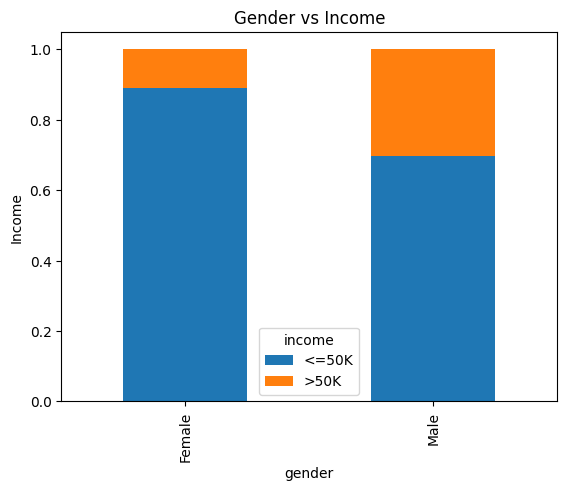

Male percentage above 50k 0.3037672281776417
Female percentage above 50k 0.10925148221343874


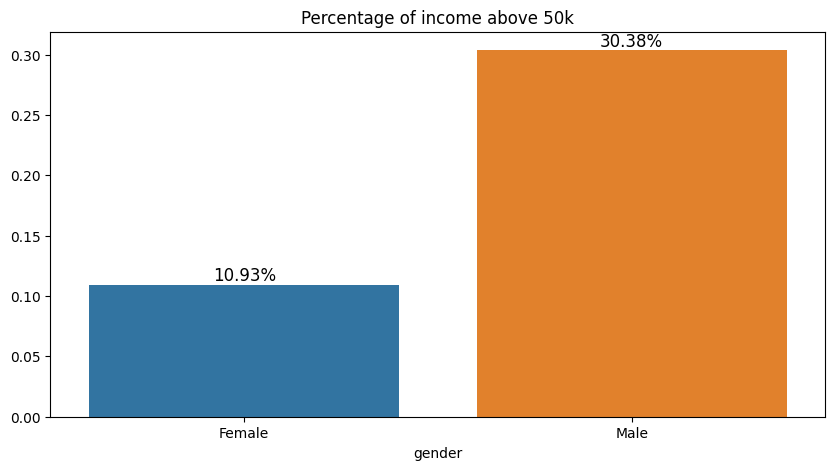

In [4]:
# gender vs income 
plot_data = pd.crosstab(data['gender'], data['income'])

plot_data.div(plot_data.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Gender vs Income')
plt.xlabel('gender')
plt.ylabel('Income')
plt.show()

# plot percentages of income above 50k
female_percentage_above_50k = plot_data.iloc[0,1] / (plot_data.iloc[0,0] + plot_data.iloc[0,1])
male_percentage_above_50k = plot_data.iloc[1,1] / (plot_data.iloc[1,0] + plot_data.iloc[1,1])

print("Male percentage above 50k", male_percentage_above_50k)
print("Female percentage above 50k", female_percentage_above_50k)

plt.figure(figsize=(10,5))
sns.barplot(x=plot_data.index, y=plot_data.iloc[:,1] / (plot_data.iloc[:,0] + plot_data.iloc[:,1]))
plt.title('Percentage of income above 50k')
# show percentages
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width()/2., p.get_height(), '{:1.2f}%'.format(p.get_height()*100), 
            fontsize=12, color='black', ha='center', va='bottom')
plt.show()


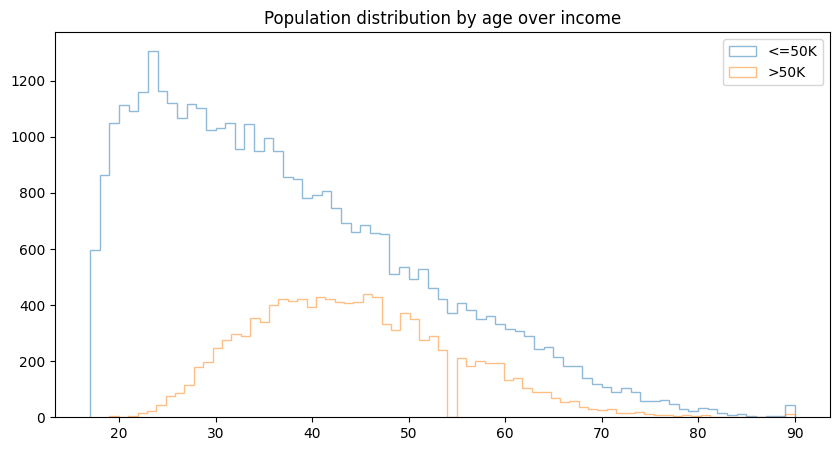

In [5]:
# population distribution by age over income
plt.figure(figsize=(10,5))
# sns.kdeplot(data.loc[(data['income'] == '<=50K'), 'age'] , label='<=50K', shade=True)
# sns.kdeplot(data.loc[(data['income'] == '>50K'), 'age'] , label='>50K', shade=True)
plt.hist(data.loc[(data['income'] == '<=50K'), 'age'] , label='<=50K', alpha=0.5, bins=73, density=False, histtype='step')
plt.hist(data.loc[(data['income'] == '>50K'), 'age'] , label='>50K', alpha=0.5, bins=73, density=False, histtype='step')
plt.title('Population distribution by age over income')
plt.legend()
plt.show()


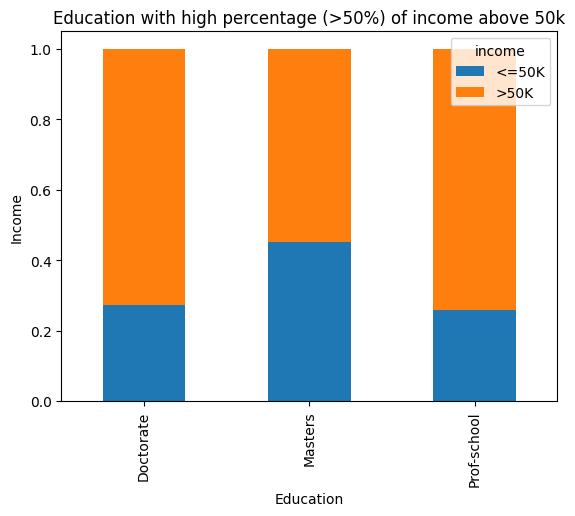

In [6]:
# education vs income distribution
plot_data = pd.crosstab(data['education'], data['income'])
# sort by income percentage
plot_data = plot_data[plot_data.iloc[:,1] / (plot_data.iloc[:,0] + plot_data.iloc[:,1]) > 0.5]

plot_data.div(plot_data.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Education with high percentage (>50%) of income above 50k')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()


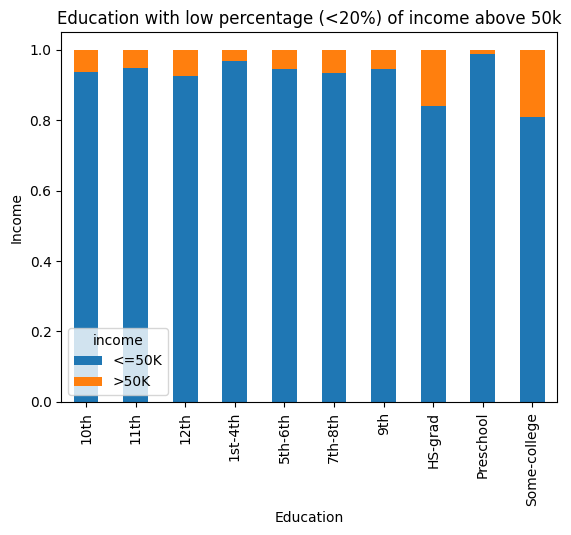

In [7]:
# education vs income distribution
plot_data = pd.crosstab(data['education'], data['income'])
# sort by income percentage
plot_data = plot_data[plot_data.iloc[:,1] / (plot_data.iloc[:,0] + plot_data.iloc[:,1]) < 0.2]

plot_data.div(plot_data.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.title('Education with low percentage (<20%) of income above 50k')
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

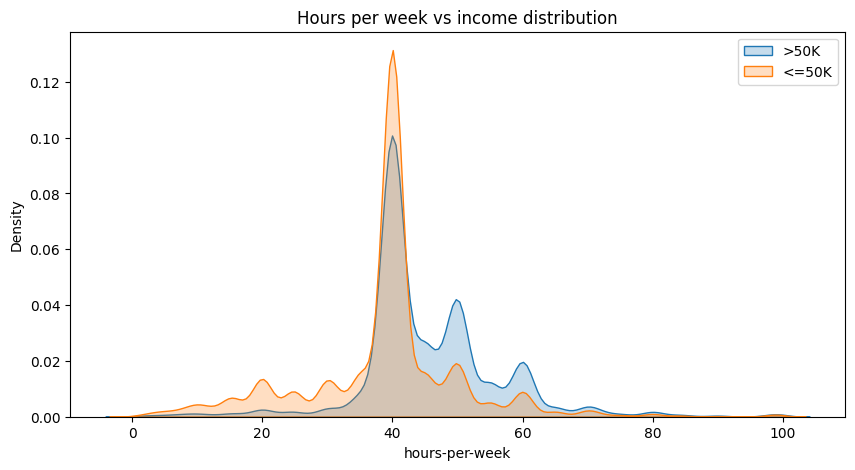

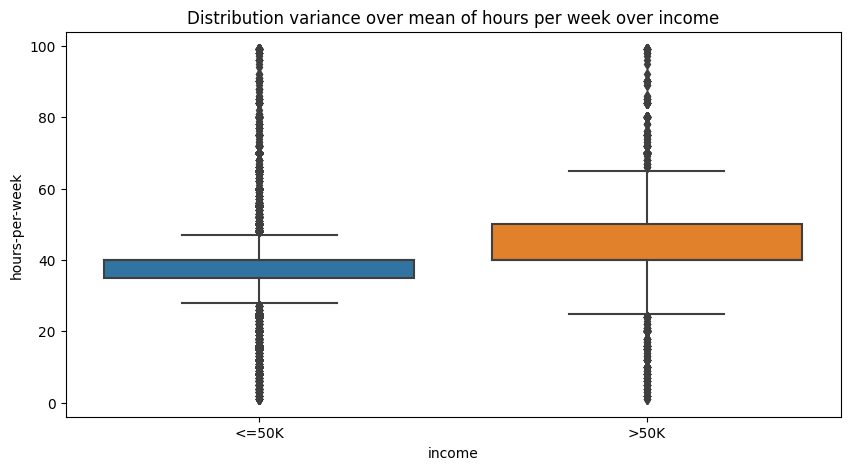

In [8]:
# hours per week vs income distribution
plt.figure(figsize=(10,5))
sns.kdeplot(data.loc[(data['income'] == '>50K'), 'hours-per-week'] , label='>50K', shade=True)
sns.kdeplot(data.loc[(data['income'] == '<=50K'), 'hours-per-week'] , label='<=50K', shade=True)
plt.title('Hours per week vs income distribution')
plt.legend()
plt.show()

# Distribution variance over mean of hours per week over income
plt.figure(figsize=(10,5))
sns.boxplot(x='income', y='hours-per-week', data=data)
plt.title('Distribution variance over mean of hours per week over income')
plt.show()


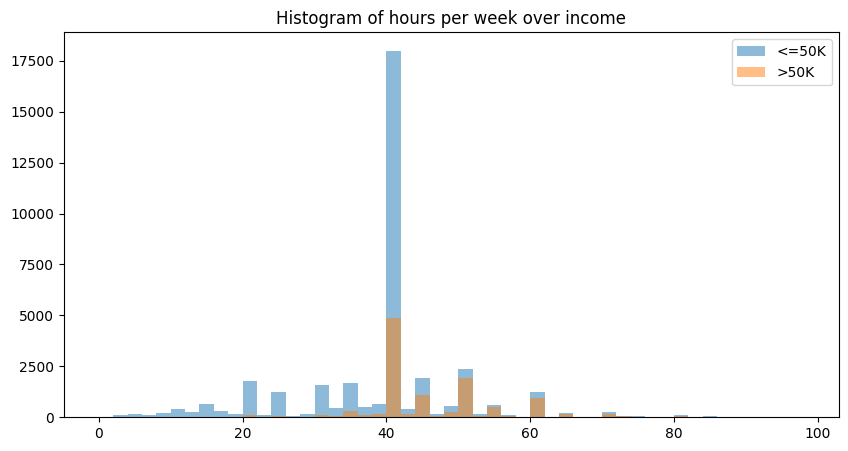

In [9]:
# histogram of hours per week over income
plt.figure(figsize=(10,5))
# bin size
bin_size = 2
plt.hist(data.loc[(data['income'] == '<=50K'), 'hours-per-week'], bins=range(0, 100, bin_size), alpha=0.5, label='<=50K')
plt.hist(data.loc[(data['income'] == '>50K'), 'hours-per-week'], bins=range(0, 100, bin_size), alpha=0.5, label='>50K')
plt.legend(loc='upper right')
plt.title('Histogram of hours per week over income')
plt.show()

> The class imbalance problem is depicted using bar graphs below:

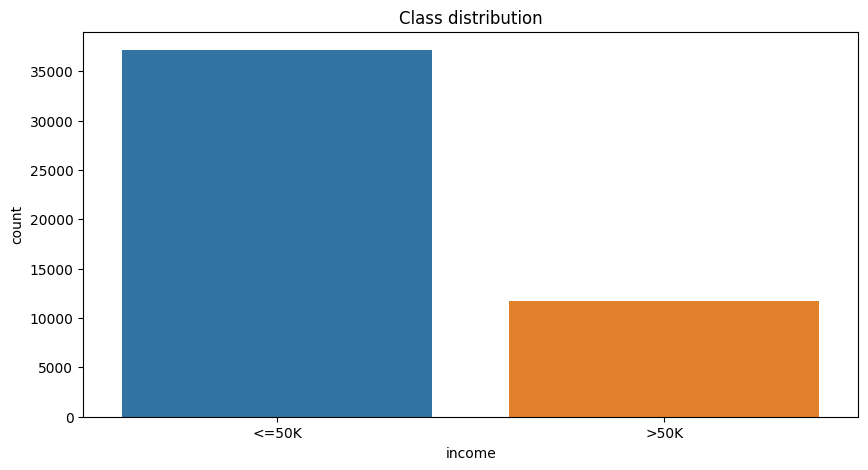

In [10]:
# class distribution
plt.figure(figsize=(10,5))
sns.countplot(x='income', data=data)
plt.title('Class distribution')
plt.show()

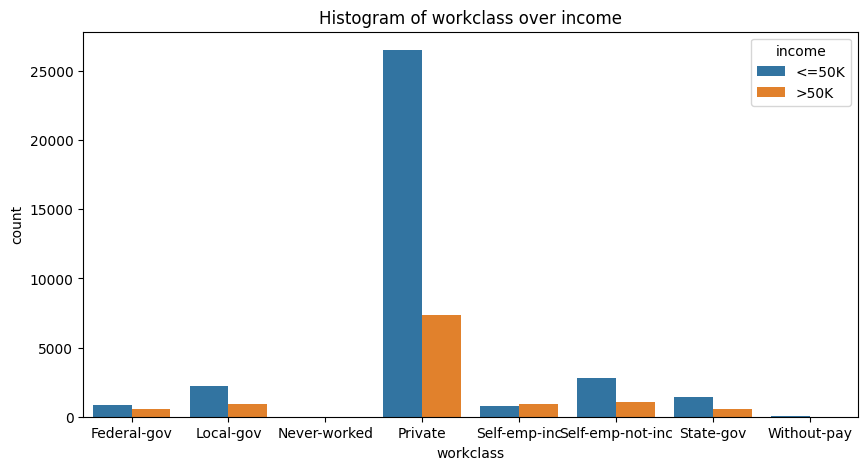

In [11]:
# histogram of workclass over income
plt.figure(figsize=(10,5))
sns.countplot(x='workclass', hue='income', data=data)
plt.title('Histogram of workclass over income')
plt.show()

### 3.1 Loading the dataset

In [12]:
def clear_global_variables():
    import sys
    for var in list(globals()):
        if var[0] != '_' and var not in ['np', 'pd', 'plt', 'sns', 'clear_global_variables']:
            del globals()[var]

clear_global_variables()

In [13]:
from cmath import nan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# column names
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num','marital-status', 'occupation', 'relationship', 'race', 'gender','capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

# load dataset
train = pd.read_csv('Data/adult.data', sep=",\s", header=None, names = col_names, na_values="?",  engine='python')
test = pd.read_csv('Data/adult.test', sep=",\s", header=None, names = col_names, na_values="?", skiprows=1, engine='python')

In [14]:
# replace . with nothing
test['income'].replace(regex=True,inplace=True,to_replace=r'\.',value=r'') 

test_ratio = len(test) / (len(train) + len(test))

data = pd.concat([train, test], ignore_index=True).reindex()

# map income to 0 and 1
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

# convert categorical to type category
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].astype('category')

### 3.3 Prepare the data for training

#### 3.3.1 Fill in missing values

In [15]:
train_nan_values_per_column = train.isnull().sum().sort_values(ascending=False)
print("Training Nan values (", train_nan_values_per_column.sum() ,"): ", train_nan_values_per_column)
test_nan_values_per_column = test.isnull().sum().sort_values(ascending=False)
print("Testing Nan values: (", test_nan_values_per_column.sum() ,"): ", test_nan_values_per_column)

Training Nan values ( 4262 ):  occupation         1843
workclass          1836
native-country      583
age                   0
fnlwgt                0
education             0
educational-num       0
marital-status        0
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
income                0
dtype: int64
Testing Nan values: ( 2203 ):  occupation         966
workclass          963
native-country     274
age                  0
fnlwgt               0
education            0
educational-num      0
marital-status       0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
income               0
dtype: int64


In [16]:
print("Nan percentage in train set: ", train_nan_values_per_column.sum() / len(train))
print("Nan percentage in test set: ", test_nan_values_per_column.sum() / len(test))

Nan percentage in train set:  0.1308927858481005
Nan percentage in test set:  0.13531109882685338


In [17]:
del train, test, train_nan_values_per_column, test_nan_values_per_column

In [18]:
print("total nan values: ", data.isnull().sum().sum())

total nan values:  6465


In [19]:
# Create one hot encoding of the categorical columns in the data frame.
def oneHotCatVars(df, df_cols):
    print(df_cols)
    return (pd.concat([df.drop(columns = df_cols, axis = 1), pd.get_dummies(df[df_cols])], axis=1, join='inner'))

def fillNanValues(df, inplace=False):
    from sklearn.linear_model import LogisticRegression
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.svm import SVC

    data_ = df.copy() if not inplace else df

    nan_values_per_column = data_.isnull().sum().sort_values(ascending=False)
    nan_values_per_column

    for feature, total_nan_vals in zip(nan_values_per_column.index, nan_values_per_column):
        if total_nan_vals == 0:
            continue

        test_data = data_[(pd.isnull(data_[feature]))].copy()
        test_label = test_data[feature]

        if len(test_data) == 0:
            print('Test data is empty')
            continue

        train_data = data_[(~pd.isnull(data_[feature]))].copy()
        train_data, train_val_data = train_test_split(train_data, test_size=0.3, random_state=42)

        train_label = train_data[feature]
        train_val_label = train_val_data[feature]

        if len(train_data) == 0:
            print('Train data is empty')
            continue

        test_data.drop(columns = [feature], inplace=True)
        train_data.drop(columns = [feature], inplace=True)
        train_val_data.drop(columns = [feature], inplace=True)

        train_data = oneHotCatVars(train_data, train_data.select_dtypes('category').columns)
        test_data = oneHotCatVars(test_data, test_data.select_dtypes('category').columns)
        train_val_data = oneHotCatVars(train_val_data, train_val_data.select_dtypes('category').columns)

        clf = DecisionTreeClassifier()
        clf = clf.fit(train_data, train_label)
        clf_pred = clf.predict(test_data)
        clf_train_accuracy = clf.score(train_data, train_label)
        clf_eval_accuracy = clf.score(train_val_data, train_val_label)

        r_forest = RandomForestClassifier(n_estimators=10)
        r_forest.fit(train_data, train_label)
        r_forest_pred = r_forest.predict(test_data)
        r_forest_train_accuracy = r_forest.score(train_data, train_label)
        r_forest_eval_accuracy = r_forest.score(train_val_data, train_val_label)

        log_reg = LogisticRegression()
        log_reg.fit(train_data, train_label)
        log_reg_pred = log_reg.predict(test_data)
        log_reg_train_accuracy = log_reg.score(train_data, train_label)
        log_reg_eval_accuracy = log_reg.score(train_val_data, train_val_label)

        svm = SVC()
        svm.fit(train_data, train_label)
        svm_pred = svm.predict(test_data)
        svm_train_accuracy = svm.score(train_data, train_label)
        svm_eval_accuracy = svm.score(train_val_data, train_val_label)

        # print accuracies
        print("Feature: ", feature)
        print("Decision Tree Accuracy: ", clf_train_accuracy, "/", clf_eval_accuracy)
        print("Random Forest Accuracy: ", r_forest_train_accuracy, "/", r_forest_eval_accuracy)
        print("Logistic Regression Accuracy: ", log_reg_train_accuracy, "/", log_reg_eval_accuracy)
        # print("SVM Accuracy: ", svm_train_accuracy, "/", svm_eval_accuracy)

        eval_predictions = pd.DataFrame({
            'RFor': r_forest_pred, 
            'LogReg': log_reg_pred,
            'SVM': svm_pred, 
            'DecisionTree': clf_pred})
        eval_accuracies = pd.DataFrame({
            'RFor': r_forest_eval_accuracy, 
            'LogReg': log_reg_eval_accuracy, 
            'SVM': svm_eval_accuracy,
            'DT': clf_eval_accuracy}, index=[0])

        # select model with highest accuracy on eval set
        best_model = eval_accuracies.T.sort_values(by=0, ascending=False).index[0]
        overall_pred = eval_predictions[best_model] 

        data_.loc[(pd.isnull(data_[feature])),feature] = overall_pred.values

    return data_

fillNanValues(data, inplace=True)

Index(['workclass', 'education', 'marital-status', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')


C:\Users\alexm\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature:  occupation
Decision Tree Accuracy:  0.9989758867889396 / 0.23685734974656047
Random Forest Accuracy:  0.9733109890450921 / 0.27516292541636495
Logistic Regression Accuracy:  0.14247587127207273 / 0.1394641564083997
Index(['education', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')
Index(['education', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')
Index(['education', 'marital-status', 'occupation', 'relationship', 'race',
       'gender', 'native-country'],
      dtype='object')


C:\Users\alexm\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature:  workclass
Decision Tree Accuracy:  0.999813838039094 / 0.6181857670310577
Random Forest Accuracy:  0.9752714861929879 / 0.7123000072395569
Logistic Regression Accuracy:  0.7380080670183059 / 0.7316296242669948
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')
Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'gender'],
      dtype='object')


C:\Users\alexm\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Feature:  native-country
Decision Tree Accuracy:  0.9999404566971329 / 0.860377882745207
Random Forest Accuracy:  0.994045669713299 / 0.9169908307863295
Logistic Regression Accuracy:  0.9127988329512638 / 0.9149763823284246


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,0
48838,64,Private,321403,HS-grad,9,Widowed,Other-service,Other-relative,Black,Male,0,0,40,United-States,0
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,0
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,0


In [20]:
print("total nan values: ", data.isnull().sum().sum())

total nan values:  0


#### 3.3.2 Duplicate Rows

In [21]:
# total number of duplicate rows
data.duplicated().sum()

56

In [22]:
data.drop_duplicates(inplace=True)

In [23]:
# total number of duplicate rows
data.duplicated().sum()

0

#### 3.3.3 Normalization of continuous features

In [24]:
# normalize continuous variables
def normalize(df, df_cols, inplace=False):
    df_ = df.copy() if not inplace else df
    df_[df_cols] = (df_[df_cols] - df_[df_cols].mean()) / df_[df_cols].std()
    return df_

# normalize continuous variables in train and test set
data = normalize(data, data.select_dtypes('float64').columns)

#### 3.3.4 Collinearity and feature selection

In [25]:
# drop irrelevant columns

# drop education-num because it is correlated with education
data.drop('educational-num', axis=1, inplace=True)

# drop fnlwgt (final weight) because it is not relevant
data.drop('fnlwgt', axis=1, inplace=True)

In [26]:
def removeHighlyCorrelatedFeatures(df, threshold, inplace=False):
    df_ = df.copy() if not inplace else df
    corr_matrix = df_.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    df_.drop(columns=to_drop, inplace=True)
    return df_

data_coll = removeHighlyCorrelatedFeatures(data, 0.9, inplace=False)

#### --------- Split data for further processing ----------

In [27]:
train, test = train_test_split(data, test_size=test_ratio, shuffle=False)
del data

#### 3.3.5 Outlier Detection

In [28]:
# outlier detection and removal
def remove_outliers(df, col, inplace=False):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    df_ = df.copy() if not inplace else df
    df_ = df_[(df_[col] > lower_bound) & (df_[col] < upper_bound)]
    return df_

In [29]:
class_imbalance_before = train["income"].value_counts().var()
train_data_shape_before = train.shape

variance_per_column = train.select_dtypes(exclude='category').var().sort_values(ascending=False)
for feature, variance in zip(variance_per_column.index, variance_per_column):
    pruned = remove_outliers(train, feature)
    if(len(pruned) < len(train)*0.5):
        train.drop(columns = [feature], inplace=True)
    else:
        train = pruned

class_imbalance_after = train["income"].value_counts().var()
train_data_shape_after = train.shape

print("Removed {} rows".format(train_data_shape_before[0] - train_data_shape_after[0]))

if class_imbalance_before > class_imbalance_after:
    print("Class imbalance reduced (%.2f) -> (%.2f)" % (class_imbalance_before, class_imbalance_after))
else:
    print("Class imbalance increased (%.2f) -> (%.2f)" % (class_imbalance_before, class_imbalance_after))

Removed 9059 rows
Class imbalance reduced (141978100.50) -> (66056018.00)


#### 3.3.6 Class imbalance problem

In [30]:
from sklearn.utils import resample

# deal with class imbalance using over sampling
def over_sample(df, feature):
    df_majority = df[df[feature] == 1]
    df_minority = df[df[feature] == 0]
    df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=123)
    df_upsampled = pd.concat([df_majority, df_minority_upsampled])
    return df_upsampled

class_imbalance_before = train["income"].value_counts().var()

# tokenize income column
train["income"] = train["income"]

train = over_sample(train, "income")

class_imbalance_after = train["income"].value_counts().var()

if class_imbalance_before > class_imbalance_after:
    print("Class imbalance reduced (%.2f) -> (%.2f)" % (class_imbalance_before, class_imbalance_after))
else:
    print("Class imbalance increased (%.2f) -> (%.2f)" % (class_imbalance_before, class_imbalance_after))

# untokenize income column
train["income"] = train["income"]

Class imbalance reduced (66056018.00) -> (0.00)


In [31]:
# select same columns from train in test
test = test[train.columns]

#### 3.3.7 PCA analysis
From the plot below we can clearly see that the 2 classes are not linearly separable. Therefore, we can not use a linear model to classify the data. We can also see that the data is not normally distributed. Therefore, we can not use a Gaussian model to classify the data.

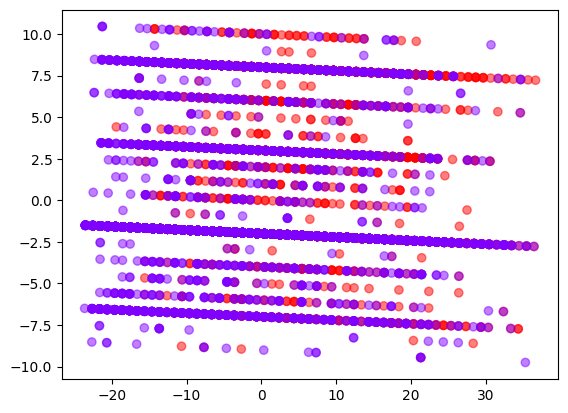

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train.select_dtypes(exclude='category').drop('income', axis=1))
pca_data = pca.transform(train.select_dtypes(exclude='category').drop('income', axis=1))

plt.scatter(pca_data[:,0], pca_data[:,1], c=train["income"], alpha=0.5, cmap='rainbow')
plt.show()

#### 3.3.8 One Hot Encoding
In the following cell we perform one hot encoding on the categorical features. To addres the fact that some of the categorical features have a large number of categories, we perform principal component analysis (**PCA**) on the one hot encoded features. We keep the first 10 principal components. The **PCA** is fitted only on the train set to **avoid** data leakage from the test set.

In [33]:
#----------------- Train
data = train.copy()

categorical_columns =  data.select_dtypes('category').columns # select categorical columns
data_1hot = pd.get_dummies(data[categorical_columns])

# Fit PCA on train data
pca = PCA(n_components=10)
pca.fit(data_1hot)

# Transform data
pca_data = pca.transform(data_1hot)
pca_data = pd.DataFrame(pca_data, columns=["pca_"+str(i) for i in range(pca_data.shape[1])])

# concatenate pca data with original data
data_1 = data.drop(categorical_columns, axis=1, inplace=False)
data_1.reset_index(drop=True, inplace=True)
pca_data.reset_index(drop=True, inplace=True)
prep_train = pd.concat([data_1, pca_data], axis=1)


In [34]:
#----------------- Test
data = test.copy()

categorical_columns =  data.select_dtypes('category').columns # select categorical columns
data_1hot = pd.get_dummies(data[categorical_columns])

# Transform data
pca_data = pca.transform(data_1hot)
pca_data = pd.DataFrame(pca_data, columns=["pca_"+str(i) for i in range(pca_data.shape[1])])

# concatenate pca data with original data
data_1 = data.drop(categorical_columns, axis=1, inplace=False)
data_1.reset_index(drop=True, inplace=True)
pca_data.reset_index(drop=True, inplace=True)
prep_test = pd.concat([data_1, pca_data], axis=1)

In [35]:
data_1hot = pd.concat([prep_train, prep_test])
data_1hot_labels = data_1hot["income"]
data_1hot.drop("income", axis=1, inplace=True)

train_data, test_data, train_label, test_label = train_test_split(data_1hot, data_1hot_labels, test_size=test_ratio, shuffle=False)

## 4. Technique (part 1)

In [36]:
from sklearn.neural_network import MLPClassifier

param_grid = {
    'hidden_layer_sizes': [i*(j,) for i in range(1,10) for j in (10,20,30)],
    'activation': ['tanh', 'relu', 'logistic', 'identity'],
    'solver': ['adam'],
    "early_stopping": [True],
    'alpha': np.logspace(-5, -1, 5),
    'learning_rate': ['constant','adaptive', 'invscaling'],
}

### c) Optimising hyper parameters

In [37]:
ann_grid = RandomizedSearchCV(MLPClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=False)
ann_grid.fit(train_data, train_label)

RandomizedSearchCV(cv=5, estimator=MLPClassifier(), n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu',
                                                       'logistic', 'identity'],
                                        'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01]),
                                        'early_stopping': [True],
                                        'hidden_layer_sizes': [(10,), (20,),
                                                               (30,), (10, 10),
                                                               (20, 20),
                                                               (30, 30),
                                                               (10, 10, 10),
                                                               (20, 20, 20),
                                                               (30, 30, 30),
                                                               (10, 10, 10, 10),
       

### d) Performance metrics for training

In [38]:
# print best parameters
print("Best parameters set found on val set:", ann_grid.best_params_)

# print best estimator
print("Best estimator found on val set:", ann_grid.best_estimator_)

# print best score
print("Best score found on val set:", ann_grid.best_score_)

# print best index
print("Best index found on val set:", ann_grid.best_index_)

Best parameters set found on val set: {'solver': 'adam', 'learning_rate': 'invscaling', 'hidden_layer_sizes': (20, 20), 'early_stopping': True, 'alpha': 0.1, 'activation': 'tanh'}
Best estimator found on val set: MLPClassifier(activation='tanh', alpha=0.1, early_stopping=True,
              hidden_layer_sizes=(20, 20), learning_rate='invscaling')
Best score found on val set: 0.7682381349557491
Best index found on val set: 4


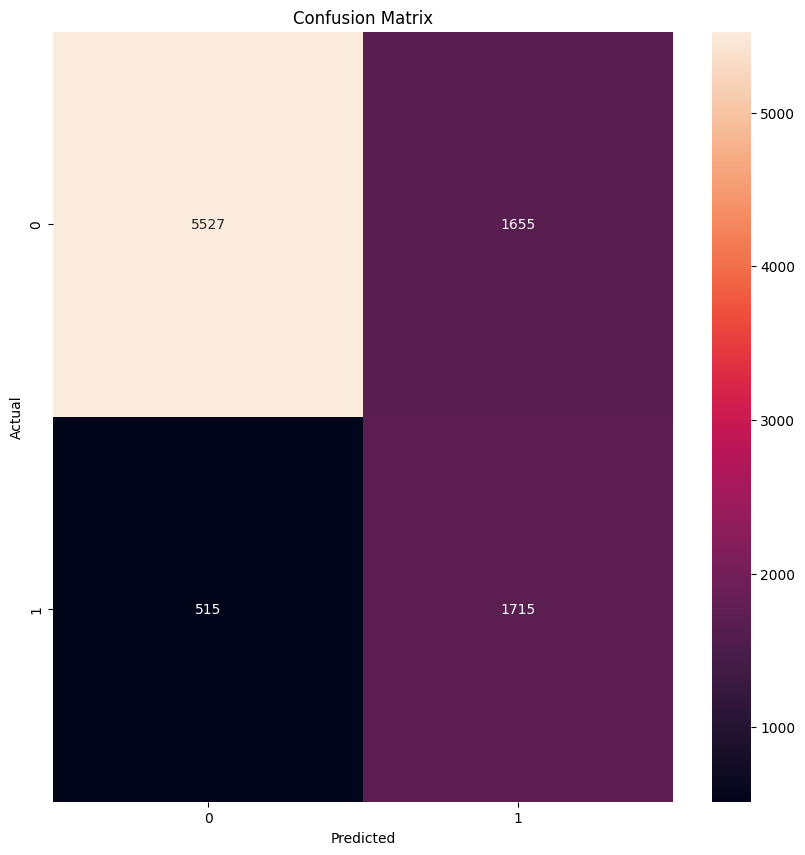

In [39]:
def plot_confusion_matrix(model, data, labels, title):
    from sklearn.metrics import confusion_matrix
    pred = model.predict(data)
    cm = confusion_matrix(labels, pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# plot confusion matrix
plot_confusion_matrix(ann_grid.best_estimator_, test_data, test_label, "Confusion Matrix")

### Other experiments

#### Simple Neural Network using PyTorch

In [40]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# pytorch hyperparameters

batch_size = 64
learning_rate = 0.001
num_epochs = 100

# pytorch dataset
class AdultDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# pytorch dataloader
train_dataset = AdultDataset(train_data.values, train_label.values)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = AdultDataset(test_data.values, test_label.values)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# pytorch model
class AdultModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(AdultModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.sigmoid(out)
        return out

# pytorch model
model = AdultModel(train_data.shape[1], 100, 1)

# pytorch loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# pytorch train the model
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (data, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(data.float())
        loss = criterion(outputs, labels.float().view(-1, 1))

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                   .format(epoch+1, num_epochs, i+1, total_step, loss.item()))

Epoch [1/100], Step [100/295], Loss: 0.6172
Epoch [1/100], Step [200/295], Loss: 0.5603
Epoch [2/100], Step [100/295], Loss: 0.4599
Epoch [2/100], Step [200/295], Loss: 0.4734
Epoch [3/100], Step [100/295], Loss: 0.5084
Epoch [3/100], Step [200/295], Loss: 0.3983
Epoch [4/100], Step [100/295], Loss: 0.3379
Epoch [4/100], Step [200/295], Loss: 0.5236
Epoch [5/100], Step [100/295], Loss: 0.4314
Epoch [5/100], Step [200/295], Loss: 0.4131
Epoch [6/100], Step [100/295], Loss: 0.4112
Epoch [6/100], Step [200/295], Loss: 0.4427
Epoch [7/100], Step [100/295], Loss: 0.4561
Epoch [7/100], Step [200/295], Loss: 0.4256
Epoch [8/100], Step [100/295], Loss: 0.4522
Epoch [8/100], Step [200/295], Loss: 0.4236
Epoch [9/100], Step [100/295], Loss: 0.4107
Epoch [9/100], Step [200/295], Loss: 0.4837
Epoch [10/100], Step [100/295], Loss: 0.3537
Epoch [10/100], Step [200/295], Loss: 0.4442
Epoch [11/100], Step [100/295], Loss: 0.5204
Epoch [11/100], Step [200/295], Loss: 0.4157
Epoch [12/100], Step [100/29

In [41]:
# compute train accuracy
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in train_loader:
        outputs = model(data.float())
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels.float().view(-1, 1)).sum().item()

    print('Train Accuracy of the model on the {} train samples: {} %'.format(total, 100 * correct / total))

# pytorch test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_loader:
        outputs = model(data.float())
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels.float().reshape(-1, 1)).sum().item()

    print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))

# pytorch save the model checkpoint
# torch.save(model.state_dict(), 'model.ckpt')

Train Accuracy of the model on the 18821 train samples: 78.9862387758355 %
Test Accuracy of the model on the 10000 test images: 77.94305142371441 %


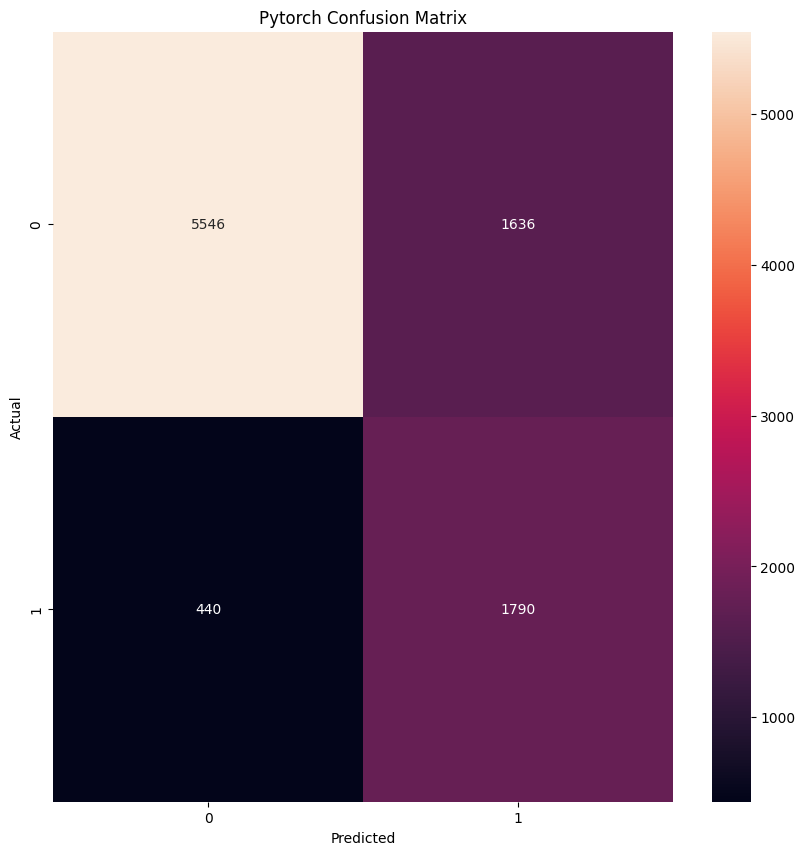

In [42]:
from sklearn.metrics import confusion_matrix


# predict on test data
pred = model(torch.tensor(test_data.values).float())
pred = (pred > 0.5).float().numpy().reshape(-1)
# map pred to income
pred = pd.Series(pred)

cm = confusion_matrix(test_label, pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Pytorch Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 5. Technique (part 2)

A first experiment was performed using a linear kernel. The results are shown below. The linear kernel is not sufficient to separate the data. Therefore, a non-linear kernel is required. Therefore, the usage of two non-linear techniques is motivated suffciently.

In [43]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(train_data.select_dtypes(exclude='category'))
pca_data = pca.transform(train_data.select_dtypes(exclude='category'))

In [44]:
from sklearn.svm import SVC

svc = SVC(kernel='linear', max_iter=1000)
svc.fit(pca_data, train_label)

# print("Accuracy:", svc.score(test_data, test_label))

C:\Users\alexm\AppData\Roaming\Python\Python39\site-packages\sklearn\svm\_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVC(kernel='linear', max_iter=1000)

In [45]:
h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = pca_data[:, 0].min() - 1, pca_data[:, 0].max() + 1
y_min, y_max = pca_data[:, 1].min() - 1, pca_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)

array([[-26.83554521, -44.09221485],
       [-26.81554521, -44.09221485],
       [-26.79554521, -44.09221485],
       ...,
       [ 52.50445479,  59.28778515],
       [ 52.52445479,  59.28778515],
       [ 52.54445479,  59.28778515]])

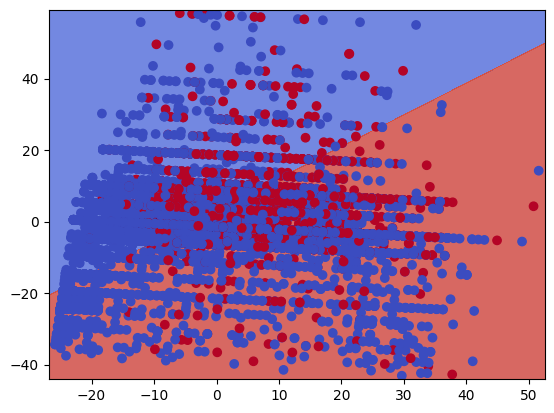

In [46]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=train_label, cmap=plt.cm.coolwarm)
np.c_[xx.ravel(), yy.ravel()]

We can see the blue and red data points **cannot** be separated by a linear hyperplane.

### b) Setting hyper parameters

In [47]:
# SVM random search
from sklearn.svm import SVC

grid_params = {
    'C': [0.5, 1, 2, 5],
    "kernel": ["poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"],
}

### c) Optimising hyper parameters


In [48]:
svc_grid = RandomizedSearchCV(SVC(), grid_params, cv=5, scoring='accuracy', n_jobs=-1, verbose=False)
# sample 1000 data points
samples = np.random.randint(0, len(train_data), 5000)
train_data.reset_index(drop=True, inplace=True)
train_label.reset_index(drop=True, inplace=True)
svc_grid.fit(train_data.loc[samples], train_label.loc[samples])

RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': [0.5, 1, 2, 5],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['poly', 'rbf', 'sigmoid']},
                   scoring='accuracy', verbose=False)

### d) Performance metrics for training

In [49]:
# print best parameters
print("Best parameters set found on val set:", svc_grid.best_params_)
# print best estimator
print("Best estimator found on val set:", svc_grid.best_estimator_)
# print best score
print("Best score found on val set:", svc_grid.best_score_)
# print best index
print("Best index found on val set:", svc_grid.best_index_)

Best parameters set found on val set: {'kernel': 'rbf', 'gamma': 'auto', 'C': 2}
Best estimator found on val set: SVC(C=2, gamma='auto')
Best score found on val set: 0.7792000000000001
Best index found on val set: 1


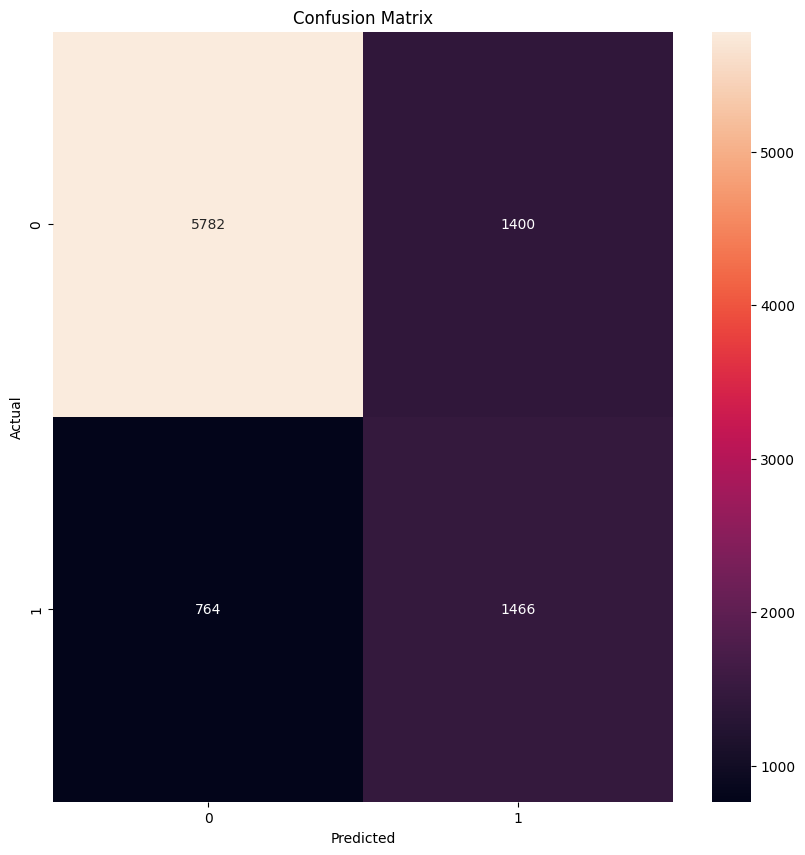

In [50]:
def plot_confusion_matrix(model, data, labels, title):
    from sklearn.metrics import confusion_matrix
    pred = model.predict(data)
    cm = confusion_matrix(labels, pred)
    plt.figure(figsize=(10, 10))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# plot confusion matrix
plot_confusion_matrix(svc_grid.best_estimator_, test_data, test_label, "Confusion Matrix")

## 6. Comparison of metrics performance for testing 

### a) Examining over-fitting
Cross validation is a powerful technique to avoid overfitting. The complete dataset is split into parts and each part is used as a validation set. This method allows us to train the model on the entire dataset. The model is trained on the training set and validated on the validation set. Both of the models achieve an accuracy of around 0.81 on the test set. Five cross validation folds are used because the dataset is small. The cross validation results are shown below. The cross validation results are very close to the results obtained on the validation set. Therefore, we can conclude that the model is not overfitting.

In [51]:
from sklearn.model_selection import cross_val_score

svc = SVC(probability=True, **svc_grid.best_params_)
svc.fit(train_data, train_label)
print("SVM Cross Validation Score: ", cross_val_score(svc, train_data, train_label, cv=5).mean())

SVM Cross Validation Score:  0.768715728654634


In [52]:
ann = MLPClassifier(**ann_grid.best_params_, verbose=False)
ann.fit(train_data, train_label)
print("ANN Cross Validation Score: ", cross_val_score(ann, train_data, train_label, cv=5).mean())

ANN Cross Validation Score:  0.7711606002486688


### b) Comparison with appropriate metrics for testing

In [53]:
import time
from sklearn.metrics import  f1_score, precision_score, recall_score

ann_inference_time = time.time()
ann_pred = ann.predict(test_data)
ann_inference_time = time.time() - ann_inference_time
print("ANN Inference Time: %0.2f" % ann_inference_time)

svc_inference_time = time.time()
svc_pred = svc.predict(test_data)
svc_inference_time = time.time() - svc_inference_time
print("SVM Inference Time: %0.2f" % svc_inference_time)

def compute_performance_metrics(pred, labels):
    from sklearn.metrics import confusion_matrix

    confusion = confusion_matrix(labels, pred)
    TP = confusion[1,1] # true positive
    TN = confusion[0,0] # true negatives
    FP = confusion[0,1] # false positives
    FN = confusion[1,0] # false negatives

    # Sensitivity, hit rate, recall, or true positive rate
    TPR = TP/(TP+FN)
    # Specificity or true negative rate
    TNR = TN/(TN+FP)
    # Precision or positive predictive value
    PPV = TP/(TP+FP)
    # Negative predictive value
    NPV = TN/(TN+FN)
    # Fall out or false positive rate
    FPR = FP/(FP+TN)
    # False negative rate
    FNR = FN/(TP+FN)
    # False discovery rate
    FDR = FP/(TP+FP)
    # Overall accuracy
    ACC = (TP+TN)/(TP+FP+FN+TN)

    out = {}
    out['TPR'] = TPR
    out['TNR'] = TNR
    out['PPV'] = PPV
    out['NPV'] = NPV
    out['FPR'] = FPR
    out['FNR'] = FNR
    out['FDR'] = FDR
    out['ACC'] = ACC

    return out

ann_metric = compute_performance_metrics(test_label, ann_pred)
svc_metric = compute_performance_metrics(test_label, svc_pred)

ANN Inference Time: 0.01
SVM Inference Time: 1.22


In [54]:
# to dataframe
df = pd.DataFrame([ann_metric, svc_metric], index=['ANN', 'SVM'])
df

,TPR,TNR,PPV,NPV,FPR,FNR,FDR,ACC
ANN,0.565555,0.887035,0.653812,0.844055,0.112965,0.434445,0.346188,0.798980
SVM,0.528200,0.896760,0.701345,0.805486,0.103240,0.471800,0.298655,0.780812


### c) Model selection
For model selection a Receiver operating characteristic (**ROC**) is used. ROC is widely used for binary classification problems since it is not sensitive to class imbalance. The ROC curve is plotted below. The area under the curve (**AUC**) is used to compare the performance of the models. The AUC of the **SVM** model is 0.88 and the AUC of the **NN** model is 0.87. Therefore, the **SVM** model is slightly better than the **NN** model.

In [55]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from itertools import cycle

test_label_binarized = test_label.to_numpy().reshape(-1, 1)
train_label_binarized = train_label.to_numpy().reshape(-1, 1)


n_classes = 1

ann_y_score = ann.predict_proba(test_data)
svc_y_score = svc.predict_proba(test_data)

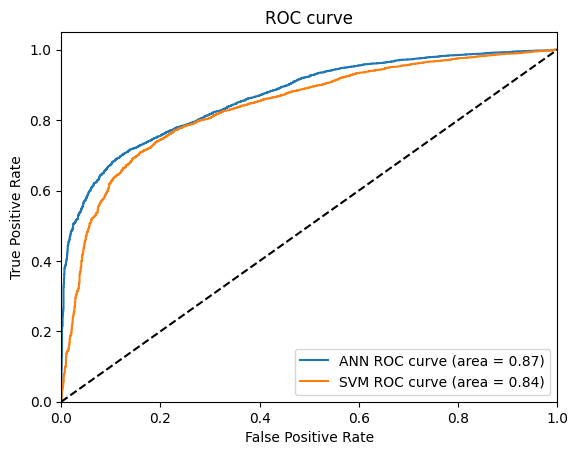

In [56]:
# Compute ROC curve and ROC area for each class
ann_fpr = dict()
ann_tpr = dict()
ann_roc_auc = dict()

svc_fpr = dict()
svc_tpr = dict()
svc_roc_auc = dict()

for i in range(n_classes):
    ann_fpr[i], ann_tpr[i], _ = roc_curve(test_label_binarized[:, i], ann_y_score[:, i], pos_label=0)
    ann_roc_auc[i] = auc(ann_fpr[i], ann_tpr[i])
    svc_fpr[i], svc_tpr[i], _ = roc_curve(test_label_binarized[:, i], svc_y_score[:, i], pos_label=0)
    svc_roc_auc[i] = auc(svc_fpr[i], svc_tpr[i])

# Compute micro-average ROC curve and ROC area
ann_fpr["micro"], ann_tpr["micro"], _ = roc_curve(test_label_binarized.ravel(), ann_y_score[:, 0])
ann_roc_auc["micro"] = auc(ann_fpr["micro"], ann_tpr["micro"])

svc_fpr["micro"], svc_tpr["micro"], _ = roc_curve(test_label_binarized.ravel(), svc_y_score[:, 0])
svc_roc_auc["micro"] = auc(svc_fpr["micro"], svc_tpr["micro"])

# Plot of a ROC curve for all classes
for i in range(n_classes):
    plt.figure()
    plt.plot(ann_fpr[i], ann_tpr[i], label='ANN ROC curve (area = %0.2f)' % ann_roc_auc[i])
    plt.plot(svc_fpr[i], svc_tpr[i], label='SVM ROC curve (area = %0.2f)' % svc_roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()


Precision recall is complementary to ROC. Precision recall is used when the classes are highly imbalanced. The precision recall curve is plotted below. The average precision (**AP**) is used to compare the performance of the models. The AP of the **SVM** model is 0.86
 and the AP of the **NN** model is 0.87 Therefore, the **SVM** model is slightly better than the **NN** model.

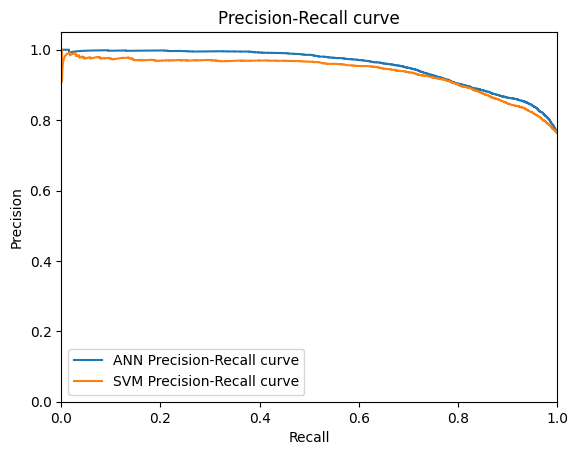

In [57]:
# precision-recall curve 
from sklearn.metrics import precision_recall_curve, average_precision_score

ann_precision, ann_recall, _ = precision_recall_curve(test_label_binarized, ann_y_score[:, 0], pos_label=0)
svc_precision, svc_recall, _ = precision_recall_curve(test_label_binarized, svc_y_score[:, 0], pos_label=0)

ann_average_precision = average_precision_score(test_label_binarized, ann_y_score[:, 0])
svm_average_precision = average_precision_score(test_label_binarized, svc_y_score[:, 0])

plt.figure()
plt.plot(ann_recall, ann_precision, label='ANN Precision-Recall curve')
plt.plot(svc_recall, svc_precision, label='SVM Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.legend(loc="lower left")
plt.show()